# Kaggle house prices prediction
## problem type: regression
## main goals: test the linear regression assumption and comparing different models

# getting and preproccesing the data

In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv.gz


In [3]:
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv', index_col='Id')

## initial data exploration

In [4]:
print("train", train.shape, "test", test.shape)

train (1460, 80) test (1459, 79)


In [5]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## preproccesing the train and test data
### handling both categorical and numerical values

In [8]:
#concat train and test to preprocces both. will split them later on BEFORE training to avoid data leakage.
X = pd.concat([train.drop("SalePrice", axis=1),test], axis=0)
y = train[['SalePrice']]
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [9]:
categorical_features = X.select_dtypes(include=object).columns.tolist()
numerical_features = X.select_dtypes(exclude=object).columns.tolist()

numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [10]:
#some numerical are actually categorical
categorical_features += ['MSSubClass', 'OverallQual', 'OverallCond']
numerical_features.remove('MSSubClass')
numerical_features.remove('OverallQual')
numerical_features.remove('OverallCond')

## categorical features preproccesing:
### filling missing values and encoding to numerical values

In [11]:
X[categorical_features] = X[categorical_features].fillna("NA")
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml


In [12]:
ordinal_features = ['Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu',
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'OverallQual', 'OverallCond']
binary_features = ['CentralAir']
col_list = ordinal_features + binary_features
label_features = [x for x in categorical_features if x not in col_list]
print(label_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [13]:
#encode ordinals
for feat in ordinal_features:
    print(feat, X[feat].unique())

Utilities ['AllPub' 'NoSeWa' 'NA']
LandSlope ['Gtl' 'Mod' 'Sev']
ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual ['Gd' 'TA' 'Ex' 'NA' 'Fa']
BsmtCond ['TA' 'Gd' 'NA' 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NA']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa' 'NA']
Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' 'NA']
FireplaceQu ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish ['RFn' 'Unf' 'Fin' 'NA']
GarageQual ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
PoolQC ['NA' 'Ex' 'Fa' 'Gd']
Fence ['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]


In [14]:
#creating numerical maps for encoding:
#utilities and kitchenQul will be handled separately: we need no work to replace thier "NA" values,
#because unlike the other features they are'nt equivalent to 0.
land_slope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
general_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
bsmt_fin_types_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
functional_map = {'Typ': 6, 'NA': 6, 'Min1': 5, 'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 1, 'Sev': 0}
garage_finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
fence_map = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}

In [15]:
def ordinalMapper(feature, dic):
    X[feature] = X[feature].map(dic)

ordinalMapper('LandSlope', land_slope_map)
ordinalMapper('BsmtExposure', bsmt_exposure_map)
ordinalMapper('BsmtFinType1', bsmt_fin_types_map)
ordinalMapper('BsmtFinType2', bsmt_fin_types_map)
ordinalMapper('Functional', functional_map)
ordinalMapper('GarageFinish', garage_finish_map)
ordinalMapper('Fence', fence_map)

feat_list = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

for feat in feat_list:
    ordinalMapper(feat, general_map)
    
X['LandSlope'].unique()

array([3, 2, 1])

In [16]:
#handle kitchen and utilities
#find where there's no kitchen, according to the NUMERIC feature KitchenAbvGr
for idx, row in X.iterrows():
    if(row['KitchenAbvGr'] == 0):
        print(idx)

955
2588
2860


In [17]:
#mark the rows found as NA, later will turn to zeroes.
X.loc[[955, 2588, 2860], 'KitchenQual'] = 'NA'

In [18]:
#fill rest of nans with the feature's mode
X['KitchenQual'] = X['KitchenQual'].fillna(X['KitchenQual'].mode()[0])
print(X['KitchenQual'].unique())
print(X['KitchenQual'].value_counts())

['Gd' 'TA' 'Ex' 'Fa' 'NA']
TA    1489
Gd    1151
Ex     205
Fa      70
NA       4
Name: KitchenQual, dtype: int64


In [19]:
ordinalMapper('KitchenQual', general_map)
print(X['KitchenQual'].value_counts())

3    1489
4    1151
5     205
2      70
0       4
Name: KitchenQual, dtype: int64


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [21]:
#fill utilities nans with the feature's mode
X['Utilities'] = X['Utilities'].replace('NA', X['Utilities'].mode()[0])
X['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [22]:
util_map = {'AllPub': 3, 'NoSeWa': 1}
ordinalMapper('Utilities', util_map)
X['Utilities'].unique()

array([3, 1])

In [23]:
#encode binary feature
X['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
#encode binary feature
bin_map = {'Y': 1, 'N': 0}
ordinalMapper('CentralAir', bin_map)
X['CentralAir'].unique()

array([1, 0])

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int64  
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

### note - the rest of the object-types are our label features. we will One-Hot encode them after the variable study, in order to understand each feature before splitting them into sub-columns

# univariable study

In [26]:
X[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2433 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   YearBuilt      2919 non-null   int64  
 3   YearRemodAdd   2919 non-null   int64  
 4   MasVnrArea     2896 non-null   float64
 5   BsmtFinSF1     2918 non-null   float64
 6   BsmtFinSF2     2918 non-null   float64
 7   BsmtUnfSF      2918 non-null   float64
 8   TotalBsmtSF    2918 non-null   float64
 9   1stFlrSF       2919 non-null   int64  
 10  2ndFlrSF       2919 non-null   int64  
 11  LowQualFinSF   2919 non-null   int64  
 12  GrLivArea      2919 non-null   int64  
 13  BsmtFullBath   2917 non-null   float64
 14  BsmtHalfBath   2917 non-null   float64
 15  FullBath       2919 non-null   int64  
 16  HalfBath       2919 non-null   int64  
 17  BedroomAbvGr   2919 non-null   int64  
 18  KitchenA

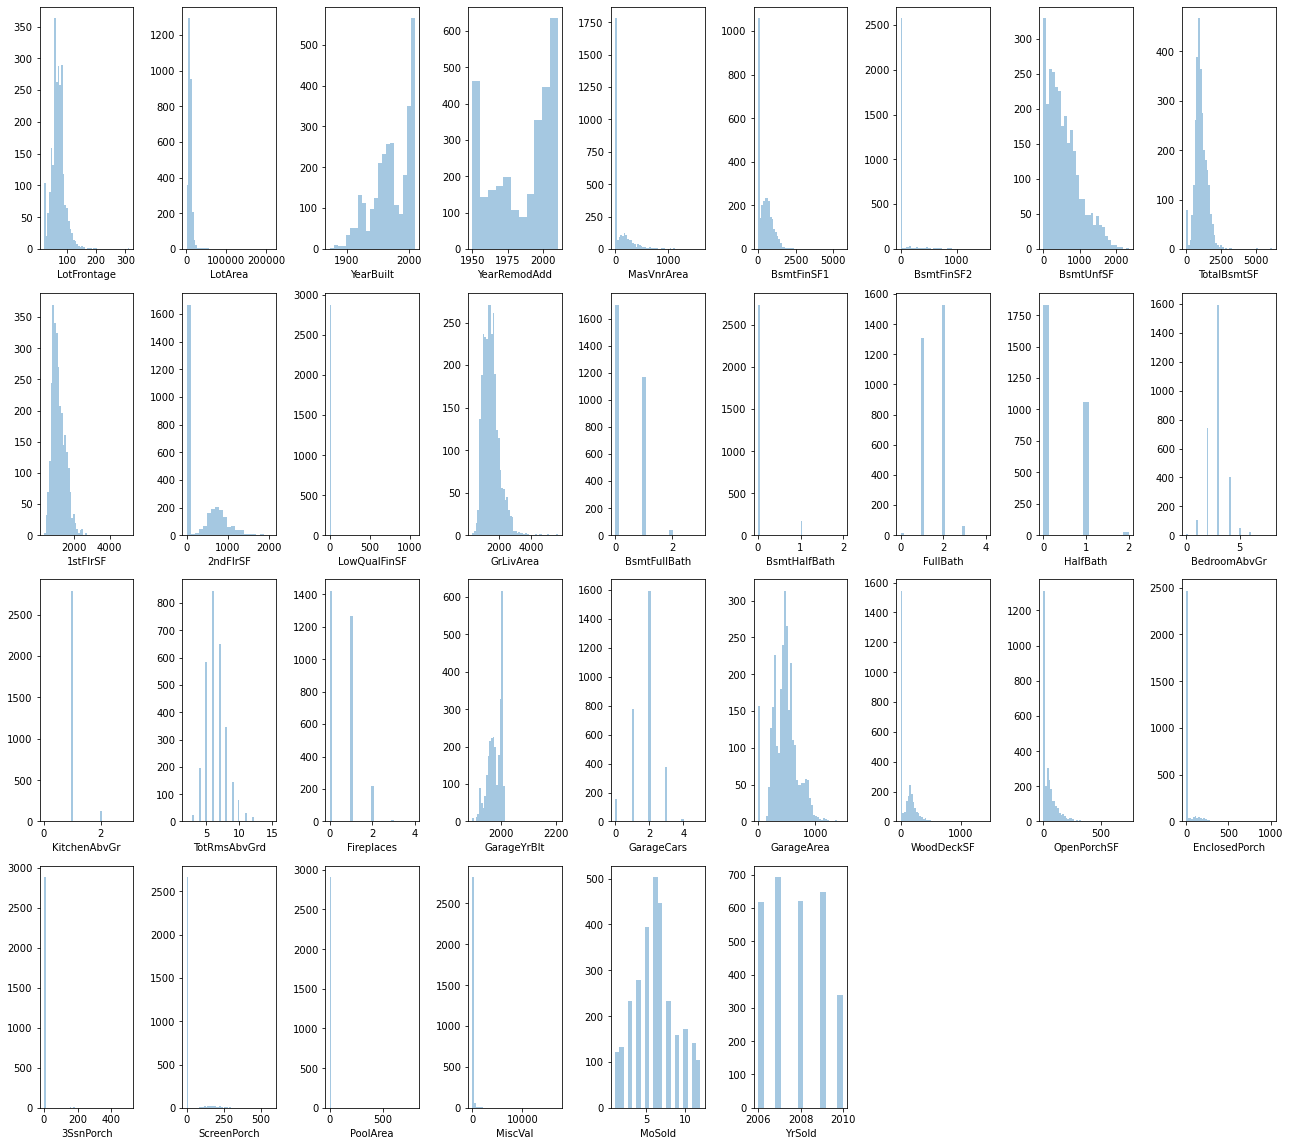

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
for index,col in enumerate(numerical_features):
    plt.subplot(4,9,index+1)
    sns.distplot(X.loc[:,col], kde=False)
fig.tight_layout(pad=1.0)

In [28]:
#to avoid division by zero
X.replace(0, np.log(1.0001), inplace=True)

In [29]:
def removeRedundentFeatures(lst, categorical_features, numerical_features):
    X.drop(lst, axis=1, inplace=True)
    categorical_features = pd.Series([x for x in categorical_features if x not in lst])
    numerical_features = pd.Series([x for x in numerical_features if x not in lst])
    return categorical_features, numerical_features

#remove the features that has almost all values as zeros
redundent_features = ['BsmtFinSF2', 'LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                      'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'BsmtHalfBath', '2ndFlrSF', 'BsmtFinSF1', 'MasVnrArea']
categorical_features, numerical_features = removeRedundentFeatures(redundent_features, categorical_features, numerical_features)

In [30]:
numerical_features

0      LotFrontage
1          LotArea
2        YearBuilt
3     YearRemodAdd
4        BsmtUnfSF
5      TotalBsmtSF
6         1stFlrSF
7        GrLivArea
8     BsmtFullBath
9         FullBath
10        HalfBath
11    BedroomAbvGr
12    KitchenAbvGr
13    TotRmsAbvGrd
14      Fireplaces
15     GarageYrBlt
16      GarageCars
17      GarageArea
18          MoSold
19          YrSold
dtype: object

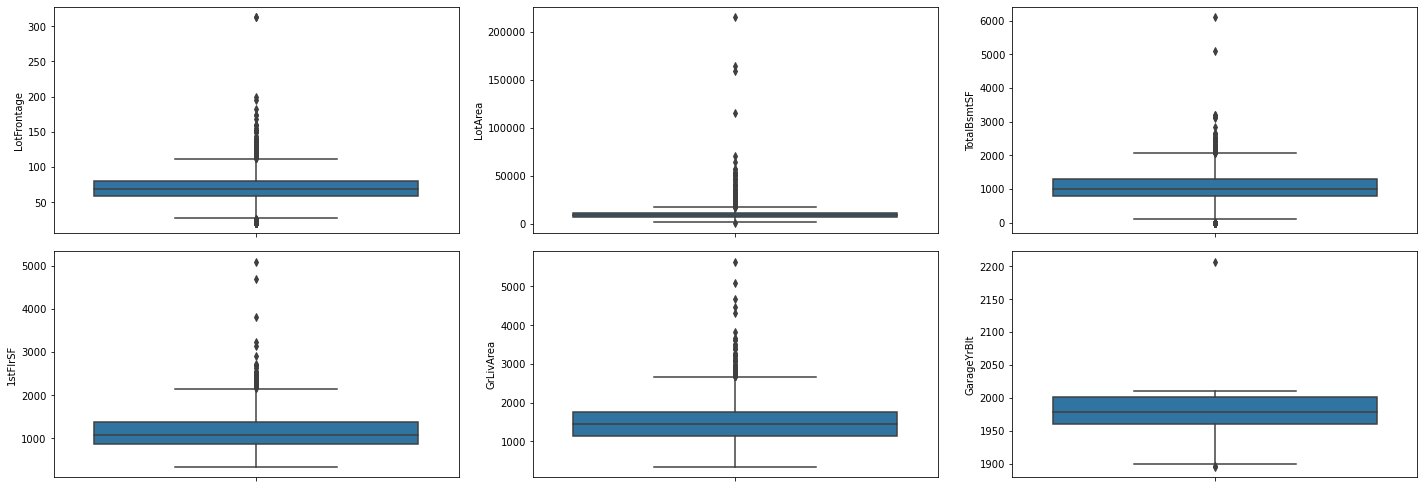

In [31]:
#remove outliers
outliers_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt',]

fig = plt.figure(figsize=(20,7))

for idx, col in enumerate(outliers_cols):
    plt.subplot(2, 3,idx+1)
    sns.boxplot(y= col, data=X)
fig.tight_layout(pad=1.5)

In [32]:
train.drop(train[train['LotFrontage'] > 250].index, inplace = True)
train.drop(train[train['LotArea'] > 100000].index, inplace = True)
train.drop(train[train['TotalBsmtSF'] > 4000].index, inplace = True)
train.drop(train[train['1stFlrSF'] > 3500].index, inplace = True)
train.drop(train[train['GrLivArea'] > 4000].index, inplace = True)
train.drop(train[train['GarageYrBlt'] > 2050].index, inplace = True)


In [33]:
train['LotArea'].max()

70761

In [34]:
len(numerical_features)

20

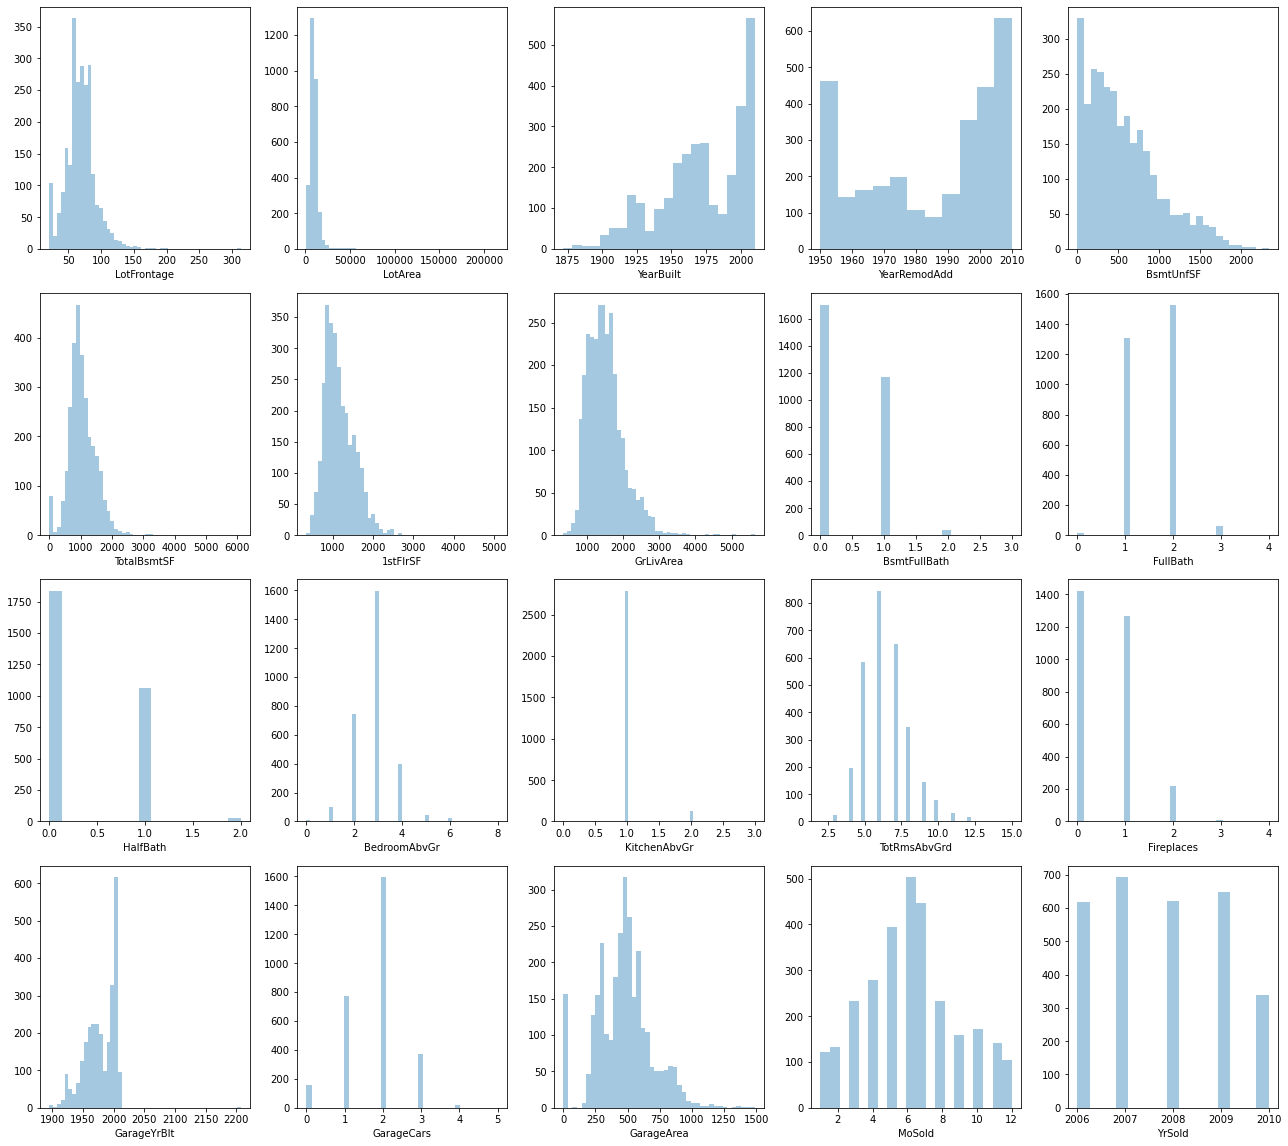

In [35]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(numerical_features):
    plt.subplot(4,5,index+1)
    sns.distplot(X.loc[:,col], kde=False)
fig.tight_layout(pad=1.0)

## Multivariable study

In [36]:
df_with_y = X.loc[1:1460].join(y)

In [37]:
df_with_y

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,3,Inside,...,3.0,Y,0.0001,0.0001,NA,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,3,FR2,...,3.0,Y,0.0001,0.0001,NA,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,3,Inside,...,3.0,Y,0.0001,0.0001,NA,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,3,Corner,...,3.0,Y,0.0001,0.0001,NA,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,3,FR2,...,3.0,Y,0.0001,0.0001,NA,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,3,Inside,...,3.0,Y,0.0001,0.0001,NA,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,3,Inside,...,3.0,Y,0.0001,3.0000,NA,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,3,Inside,...,3.0,Y,0.0001,4.0000,Shed,5,2010,WD,Normal,266500


In [38]:
correlations = df_with_y.corr()
correlations['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.655560
GarageCars      0.640413
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585211
FullBath        0.560665
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Fireplaces      0.466925
HeatingQC       0.427649
BsmtExposure    0.374695
LotFrontage     0.351799
BsmtFinType1    0.304907
HalfBath        0.284106
GarageQual      0.273840
LotArea         0.263843
GarageCond      0.263191
CentralAir      0.251328
BsmtFullBath    0.227121
BsmtUnfSF       0.214479
BsmtCond        0.212608
BedroomAbvGr    0.168214
PoolQC          0.111696
Functional      0.107619
MoSold          0.046432
ExterCond       0.018899
Utilities       0.014314
BsmtFinType2   -0.005326
YrSold         -0.028923
LandSlope      -0.051152
OverallCond    -0.077856


In [39]:
redundent_features = correlations['SalePrice'].loc[correlations['SalePrice'] < 0.2].index
categorical_features, numerical_features = removeRedundentFeatures(redundent_features, categorical_features, numerical_features)
numerical_features

0      LotFrontage
1          LotArea
2        YearBuilt
3     YearRemodAdd
4        BsmtUnfSF
5      TotalBsmtSF
6         1stFlrSF
7        GrLivArea
8     BsmtFullBath
9         FullBath
10        HalfBath
11    TotRmsAbvGrd
12      Fireplaces
13     GarageYrBlt
14      GarageCars
15      GarageArea
dtype: object

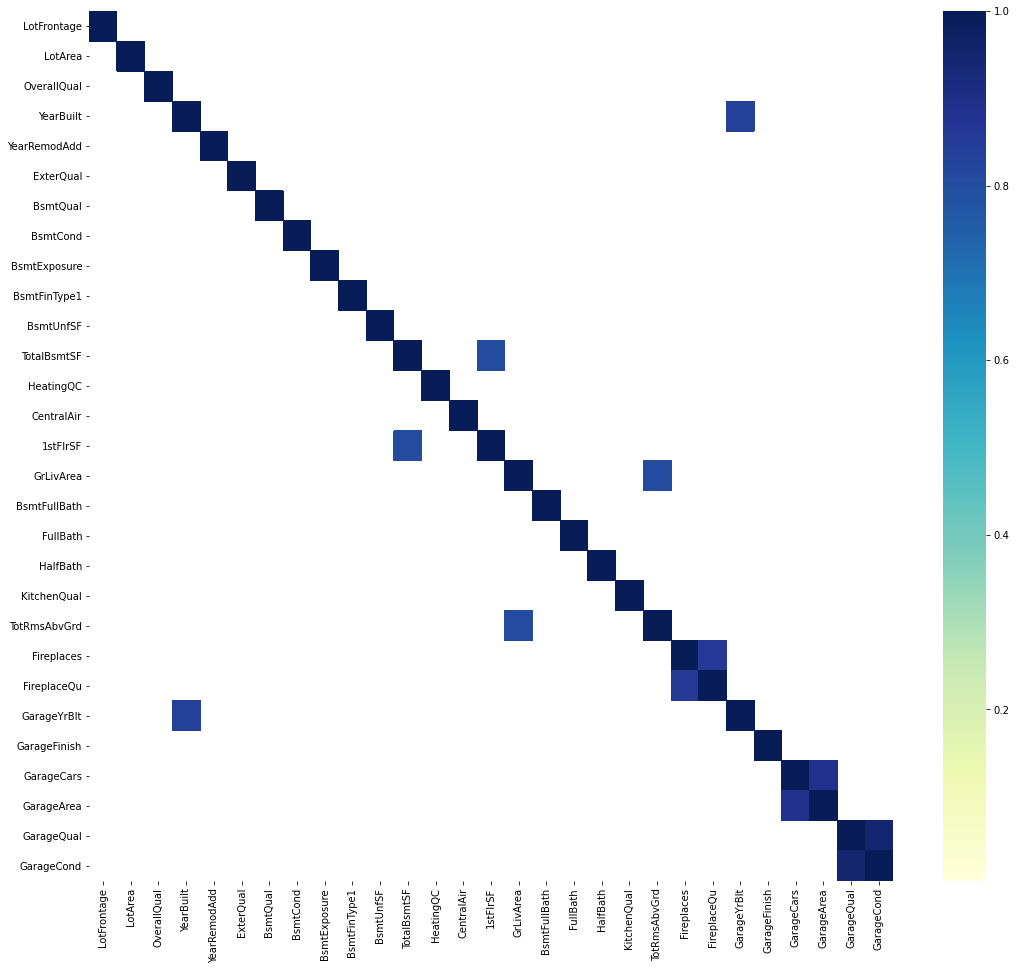

In [40]:
correlations = X.corr().abs()
fig = plt.figure(figsize=(18,16))
sns.heatmap(correlations, mask = correlations < 0.8, cmap="YlGnBu")

## cleaning

In [41]:
#matrix's upper triangle to avoid duplicates
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))
upper

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
LotFrontage,NaN,0.489896,0.217645,0.122811,0.091557,0.164726,0.113473,0.005805,0.177063,0.046159,...,0.185241,0.349513,0.261970,0.246242,0.076673,0.226224,0.310589,0.359786,0.121552,0.111086
LotArea,NaN,NaN,0.100541,0.024128,0.021612,0.061780,0.059865,0.003586,0.189456,0.041189,...,0.080082,0.213802,0.261189,0.189278,0.008628,0.114807,0.180435,0.213251,0.085902,0.075589
OverallQual,NaN,NaN,NaN,0.597554,0.571532,0.733355,0.643680,0.272335,0.350903,0.283340,...,0.664210,0.389761,0.390747,0.484378,0.571803,0.551719,0.600746,0.565122,0.299724,0.289865
YearBuilt,NaN,NaN,NaN,NaN,0.612235,0.605759,0.621375,0.189188,0.317630,0.374566,...,0.525812,0.114280,0.170673,0.244757,0.834812,0.595024,0.538076,0.480735,0.297728,0.278155
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,0.607421,0.527046,0.184426,0.239340,0.246637,...,0.607264,0.198250,0.134151,0.228700,0.652365,0.447678,0.426025,0.376765,0.163010,0.149137
ExterQual,NaN,NaN,NaN,NaN,NaN,NaN,0.574613,0.184291,0.293944,0.242723,...,0.707663,0.271742,0.245434,0.358786,0.601779,0.503393,0.523727,0.502982,0.221496,0.204203
BsmtQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625147,0.436255,0.419866,...,0.513256,0.179812,0.245209,0.314317,0.590895,0.480807,0.464310,0.423541,0.209089,0.198929
BsmtCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264292,0.307038,...,0.174606,0.009291,0.097890,0.106831,0.170464,0.164341,0.140468,0.136459,0.140407,0.144312
BsmtExposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.367064,...,0.266056,0.034851,0.217920,0.204993,0.279531,0.277386,0.271709,0.280757,0.090129,0.075564
BsmtFinType1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.251633,0.053083,0.174370,0.145345,0.292602,0.267214,0.221540,0.236044,0.181558,0.166838


### remove features that have low correlation with the dependent variable

In [42]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['1stFlrSF',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageArea',
 'GarageCond']

In [43]:
categorical_features, numerical_features = removeRedundentFeatures(to_drop, categorical_features, numerical_features)

In [44]:
X = pd.get_dummies(X)
print(X.shape)
X.head()

(2919, 203)


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,4,4.0,3.0,1.0,6.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,1976,1976,3,4.0,3.0,4.0,5.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,2001,2002,4,4.0,3.0,2.0,6.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,1915,1970,3,3.0,4.0,1.0,5.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,2000,2000,4,4.0,3.0,3.0,6.0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
print((X.isna().any()).unique())
print((y.isna().any()).unique())

[ True False]
[False]


### there are still missing values in X, we'll find and replace them

In [46]:
null_cols = X.columns[X.isna().any()].tolist()
null_cols

['LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageCars']

In [47]:
def fillNaWithMode(col):
    X[col].fillna(X[col].mode()[0], inplace=True)

for col in null_cols:
    fillNaWithMode(col)
print((X.isna().any()).unique())

[False]


## Multivariate normal distribution

In [48]:
def noTransformation(col):
    return col
def sqrtTransformation(col):
    return col**0.5
def cubeRootTransformation(col):
    return col**(1/3)
def logTransformation(col):
    return np.log(col)
def doubleLogTransformation(col):
    return np.log(np.abs(np.log(col)))
def reciprocalTransformation(col):
    return 1/col
def squareTransformation(col):
    return col**2
def thirdPowerTransformation(col):
    return col**3


def skewReduce(col):
    d = {np.abs(col.skew()): noTransformation, np.abs((col**0.5).skew()): sqrtTransformation,
         np.abs((col**(1/3)).skew()): cubeRootTransformation, np.abs((np.log(col)).skew()): logTransformation,
          np.abs((np.log(np.log(col))).skew()): doubleLogTransformation, np.abs((1/col).skew()): reciprocalTransformation, 
          np.abs((col**2).skew()): squareTransformation, np.abs((col**3).skew()): thirdPowerTransformation}
    if(np.abs(col.skew()) > 0.5):
        skew = min(d.keys())
        return d[skew]
    else:
        return noTransformation

In [49]:
len(numerical_features)

12

In [50]:
discrete_numerical_features = ['BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                              'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
continuous_numerical_features = [x for x in numerical_features if x not in discrete_numerical_features]

In [51]:
len(continuous_numerical_features)

7

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


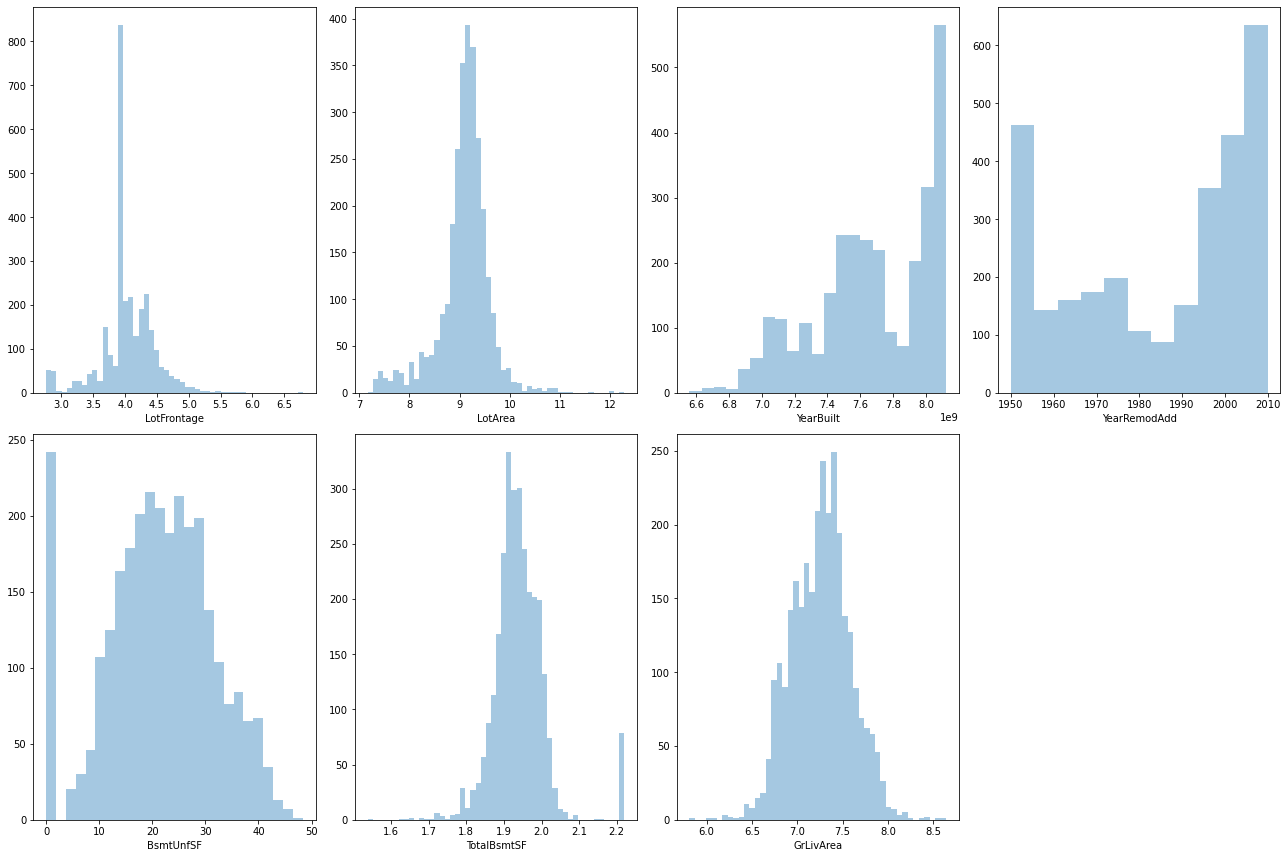

In [52]:
for col in continuous_numerical_features:
    f = skewReduce(X[col])
    X[col] = f(X[col])
    
fig = plt.figure(figsize=(18,12))
for index,col in enumerate(continuous_numerical_features):
    plt.subplot(2,4,index+1)
    sns.distplot(X.loc[:,col], kde=False)
fig.tight_layout(pad=1.0)

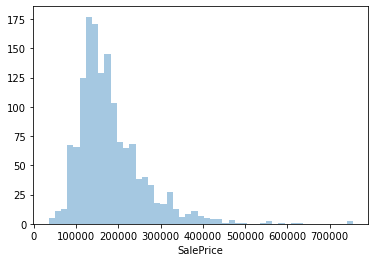

In [53]:
sns.distplot(y['SalePrice'], kde=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


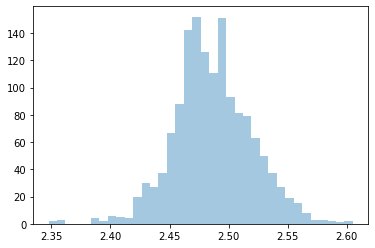

In [54]:
f = skewReduce(y['SalePrice'])
y['SalePrice'] = f(y['SalePrice'])
sns.distplot(y, kde=False)

In [55]:
y.head()

,SalePrice
Id,
1,2.505338
2,2.493950
3,2.510994
4,2.472277
5,2.520050


In [56]:
X.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,4.020726,9.041922,7,8036054027,2003,4,4.0,3.0,1.0,6.0,...,0,0,0,1,0,0,0,0,1,0
2,4.308869,9.169518,6,7715442176,1976,3,4.0,3.0,4.0,5.0,...,0,0,0,1,0,0,0,0,1,0
3,4.081655,9.328123,7,8012006001,2002,4,4.0,3.0,2.0,6.0,...,0,0,0,1,0,0,0,0,1,0
4,3.914868,9.164296,7,7022735875,1970,3,3.0,4.0,1.0,5.0,...,0,0,0,1,1,0,0,0,0,0
5,4.379519,9.565214,8,8000000000,2000,4,4.0,3.0,3.0,6.0,...,0,0,0,1,0,0,0,0,1,0


## model and prediction

In [57]:
X.shape, y.shape

((2919, 203), (1460, 1))

In [58]:
X_from_train = X.loc[train.index]
y_from_train = y.loc[train.index]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_from_train, y_from_train, test_size=0.25, random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = multiple_linear_regressor.predict(X_test)

In [62]:
multiple_linear_regressor.score(X_test, y_test)

0.9079529847961886

In [63]:
y_pred.shape

(363, 1)

In [64]:
preds = y_pred.flatten()
# in order to get results in the base units, we need to inverse the transormation we applyed on y (double log)
preds_inversed = np.exp(np.exp(preds))
preds_inversed

array([142801.74909641, 144864.912445  , 232284.66885554, 280972.35178747,
       223404.0851772 , 187160.18715526, 216204.11145575, 163543.31329607,
       325539.79247964,  86006.24268304, 102206.65937715, 143574.07262177,
       140022.35170107, 311419.74324789, 277186.87583544, 204226.37072039,
       112680.87303707,  41863.53114551, 140004.49998718, 139332.22648605,
       148519.47003379,  68912.75253385, 162045.01552885, 331733.38789025,
       270029.26147202, 143769.8074383 , 168799.65035629, 131535.95657767,
       129207.86073626, 293045.57634135, 160927.73392622, 187876.89762803,
       125076.34385106, 414704.47957272, 130504.71331931,  81675.14689531,
       246657.38500816, 131833.81710118, 129971.97593095,  91213.29582431,
       258729.73719707, 176150.36573665, 196215.68547283, 187190.69122182,
       316588.09356914, 119609.30798252,  88079.07855479, 299156.65109918,
       162951.21013558, 138643.28776766, 115078.05667289, 316726.1360709 ,
       233906.73458046, 1

# Comparing models to get the best prediction

In [65]:
from sklearn.svm import LinearSVR
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
y_flat = y_train.to_numpy().ravel()
#sc_x = StandardScaler()
#sc_y = StandardScaler()
#scaled_X_train = sc_x.fit_transform(X_train)
#scaled_y_train = sc_y.fit_transform(y_flat)
#scaled_X_test = sc_x.transform(X_test)
#scaled_y_test = sc_y.transform(y_test)

## SVR

In [66]:
#svr_regressor = LinearSVR(loss='squared_epsilon_insensitive', dual=False, random_state=0)
#svr_regressor.fit(scaled_X_train, scaled_y_train.ravel())
svr_regressor = make_pipeline(StandardScaler(), LinearSVR(loss='squared_epsilon_insensitive', dual=False, random_state=0))
svr_regressor.fit(X_train, y_flat)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=False, loss='squared_epsilon_insensitive',
                           random_state=0))])

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = make_pipeline(StandardScaler(), RandomForestRegressor())
random_forest_regressor.fit(X_train, y_flat)
#random_forest_regressor = RandomForestRegressor()
#random_forest_regressor.fit(scaled_X_train, scaled_y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

## Lasso

In [68]:
from sklearn.linear_model import LassoCV
lasso_regressor = make_pipeline(StandardScaler(), LassoCV())
lasso_regressor.fit(X_train, y_flat)


Pipeline(steps=[('standardscaler', StandardScaler()), ('lassocv', LassoCV())])

In [69]:
## Ridge

In [70]:
from sklearn.linear_model import RidgeCV
ridge_regressor = make_pipeline(StandardScaler(), RidgeCV())
ridge_regressor.fit(X_train, y_flat)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def RMSE(predicted_vals, real_vals):
    return sqrt(mean_squared_error(predicted_vals, real_vals))

In [72]:
def inverseDoubleLog(scaled_data):
    return np.exp(np.exp(scaled_data))
    
def mapper(model):
    return list(map(inverseDoubleLog, [model.predict(X_test), y_test]))

In [73]:
y_test.shape, X_test.shape

((363, 1), (363, 203))

In [74]:
model_list = [multiple_linear_regressor, svr_regressor, random_forest_regressor, lasso_regressor, ridge_regressor]
model_performances = pd.DataFrame({
    "Model" : ["Multiple Linear Regression", "SVR", "Random Forest Regression", "Lasso", "Ridge"],
    "RMSE" : [RMSE(mapper(model)[0], mapper(model)[1]) for model in model_list],
    "R^2" : [model.score(X_test, y_test) for model in model_list]
})

display(model_performances)

,Model,RMSE,R^2
0,Multiple Linear Regression,20032.560171,0.907953
1,SVR,20022.961485,0.908537
2,Random Forest Regression,23247.911579,0.893108
3,Lasso,18450.765987,0.919349
4,Ridge,19852.390250,0.910734


## seems the random forest had the lowest RMSE, possibly due to its inability to extrapolate. I will try stacking of the other models

In [76]:
from sklearn.ensemble import StackingRegressor

lasso_stacking_estimators = [('Multiple Linear Regression', multiple_linear_regressor),
                             ('SVR', svr_regressor),
                             ('Ridge', ridge_regressor)]

lasso_stacking_regressor = StackingRegressor(estimators=lasso_stacking_estimators,
                                       final_estimator=LassoCV())

lasso_stacking_regressor.fit(X_train, y_flat)

ridge_stacking_estimators = [('Multiple Linear Regression', multiple_linear_regressor),
                             ('SVR', svr_regressor),
                             ('Lasso', lasso_regressor)]

ridge_stacking_regressor = StackingRegressor(estimators=ridge_stacking_estimators,
                                       final_estimator=RidgeCV())

ridge_stacking_regressor.fit(X_train, y_flat)


StackingRegressor(estimators=[('Multiple Linear Regression',
                               LinearRegression()),
                              ('SVR',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('linearsvr',
                                                LinearSVR(dual=False,
                                                          loss='squared_epsilon_insensitive',
                                                          random_state=0))])),
                              ('Lasso',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('lassocv', LassoCV())]))],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [77]:
model_list = [multiple_linear_regressor, svr_regressor, random_forest_regressor, lasso_regressor, ridge_regressor,
             lasso_stacking_regressor, ridge_stacking_regressor]
model_performances = pd.DataFrame({
    "Model" : ["Multiple Linear Regression", "SVR", "Random Forest Regression", "Lasso", "Ridge", "lasso stacking", "ridge stacking"],
    "RMSE" : [RMSE(mapper(model)[0], mapper(model)[1]) for model in model_list],
    "R^2" : [model.score(X_test, y_test) for model in model_list]
})

display(model_performances)

,Model,RMSE,R^2
0,Multiple Linear Regression,20032.560171,0.907953
1,SVR,20022.961485,0.908537
2,Random Forest Regression,23247.911579,0.893108
3,Lasso,18450.765987,0.919349
4,Ridge,19852.390250,0.910734
5,lasso stacking,19872.246054,0.911586
6,ridge stacking,19246.502926,0.916360


## Ridge stacking gave the best R^2, and Lasso gave the best RMSE! finally, let's inverse the scaling we perfomed on the predictions, and create a submission file

In [79]:
X_test_set = X.loc[test.index]

In [82]:
y_preds_lasso = lasso_regressor.predict(X_test_set)
res_lasso = inverseDoubleLog(y_preds_lasso)
y_preds_ridge_stacking = ridge_stacking_regressor.predict(X_test_set)
res_ridge_stacking = inverseDoubleLog(y_preds_ridge_stacking)

In [ ]:
submission_lasso = pd.DataFrame({'Id': test.index, 'SalePrice': res_lasso})
submission_lasso.to_csv("./submission_lasso.csv", index=False)
submission_ridge_stacking = pd.DataFrame({'Id': test.index, 'SalePrice': res_ridge_stacking})
submission_ridge_stacking.to_csv("./submission_ridge_stacking.csv", index=False)